Modified linear regression.

$$J(\theta)=\left(\frac{1}{2} \sum_{i=1}^m\left(h_\theta\left(x^{(i)}\right)-y^{(i)}\right)^2\right)+\frac{1}{2} \lambda\|\theta\|^2$$



Part A)

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Synthetic data generation

In [ ]:
np.random.seed(123)
# Generate random x values
x = np.random.uniform(-10, 10, size=(100,))

# Generate corresponding y values with some noise
y = 2 + 2.5 * x + np.random.normal(0, 1, size=(100,))

# Reshape x to a 2D array
x = x.reshape(-1, 1)

print(x.shape)

(100, 1)


How does the data look like?

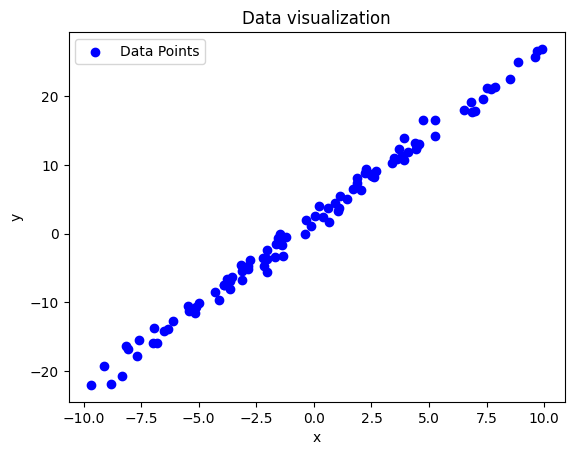

In [ ]:
# Data visualization
plt.scatter(x, y, c='b', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data visualization')
plt.legend()
plt.show()

Let's fit some lines to the data

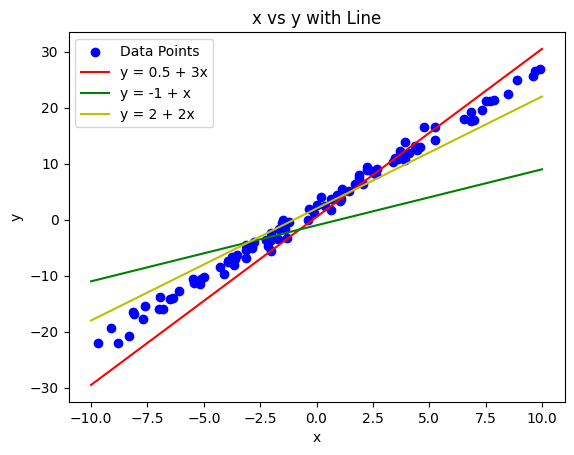

In [ ]:
# Plot x vs y as scatter plot
plt.scatter(x, y, c='b', label='Data Points')

# Generate the line y = 0.5 + 3x
x_line = np.linspace(-10, 10, 100)
y_line_1 = 0.5 + 3 * x_line
y_line_2 = -1 + 1 * x_line
y_line_3 = 2 + 2 * x_line

# Plot the line on top of the scatter plot
plt.plot(x_line, y_line_1, c='r', label='y = 0.5 + 3x')
plt.plot(x_line, y_line_2, c='g', label='y = -1 + x')
plt.plot(x_line, y_line_3, c='y', label='y = 2 + 2x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y with Line')
plt.legend()
plt.show()

We will find the parameters $\theta$ that minimize the cost function defined above.

Part A: sklearn ridge

2.0354330572484027


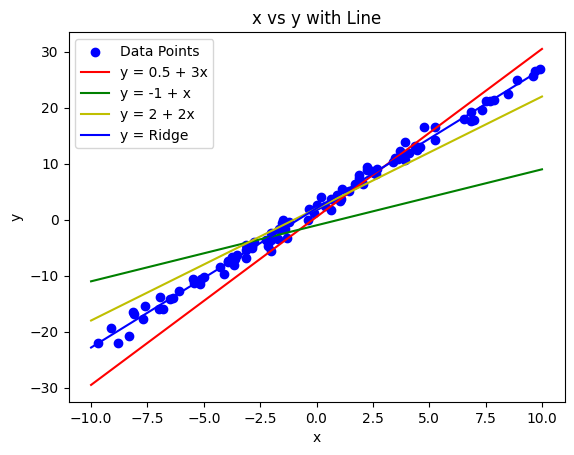

In [ ]:
# Use the Ridge model from sklearn to find optimal parameters $\theta$
# Use lambda_ridge = 0.3
from sklearn.linear_model import Ridge

# Your code here
ridge_reg = Ridge(alpha=0.3, solver="cholesky", random_state=42)
ridge_reg.fit(x, y)
ridge_reg.intercept_, ridge_reg.coef_
print(ridge_reg.intercept_)
theta_R=np.array([ridge_reg.intercept_,ridge_reg.coef_[0]])
# Plot x vs y as scatter plot
plt.scatter(x, y, c='b', label='Data Points')

# Generate the line y = 0.5 + 3x
x_line = np.linspace(-10, 10, 100)
y_line_1 = 0.5 + 3 * x_line
y_line_2 = -1 + 1 * x_line
y_line_3 = 2 + 2 * x_line
y_line_4 = 2.0354330572484027 + 2.48623799*x_line

# Plot the line on top of the scatter plot
plt.plot(x_line, y_line_1, c='r', label='y = 0.5 + 3x')
plt.plot(x_line, y_line_2, c='g', label='y = -1 + x')
plt.plot(x_line, y_line_3, c='y', label='y = 2 + 2x')
plt.plot(x_line, y_line_4, c='b', label='y = Ridge')

plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y with Line')
plt.legend()
plt.show()


In [ ]:
print(ridge_reg.intercept_)
print(ridge_reg.coef_)

2.0354330572484027
[2.48623799]


Part B: Normal Equations

In [ ]:
# Find the optimal value of $\theta$ using the provided normal equation.
# Recall that x does not include the intercept term, so you will need to add it yourself.

# Your code here
lambda_ridge = 0.3
# Add the intercept term (a column of 1s) to X.
X = np.concatenate((np.ones((len(x), 1)), x), axis=1)
# Calculate (X^T X)^-1
XTX = np.dot(X.T, X)
identity = np.identity(2)
XTX_inv = np.linalg.inv(XTX+lambda_ridge*identity)

# Calculate X^T y
XTy = np.dot(X.T, y)

# Calculate theta
thetaN = np.dot(XTX_inv, XTy)
print(thetaN)




[2.02934482 2.48624521]


Part C: Gradient Descent

Implement GD

In [ ]:
import numpy as np

# Set value of learning rate
alpha = 0.0001
# Set maximum number of iterations
numIter = 2000

thetaGD = np.array([0, 0])

for iteration in range(numIter):
    error = np.dot(thetaGD, X.T) - y
    pendiente = np.dot(error, X) + lambda_ridge * thetaGD
    thetaGD = thetaGD - alpha * pendiente

print("The Optimal Theta is:", thetaGD)



The Optimal Theta is: [2.02934481 2.48624521]


Part D: Compare the results

In [ ]:
# Output the value of theta in ALL cases and comment on the results
# sklearn ridge regression
print("Sklearn Ridge Regression")
print(ridge_reg.intercept_)
print(ridge_reg.coef_)
print("")
# Normal Equations
print("Normal Equation Theta")
print(thetaN)
print("")
# Gradient Descent
print("Gradient Descent Theta")
print(thetaGD)


Sklearn Ridge Regression
2.0354330572484027
[2.48623799]

Normal Equation Theta
[2.02934482 2.48624521]

Gradient Descent Theta
[2.02934481 2.48624521]


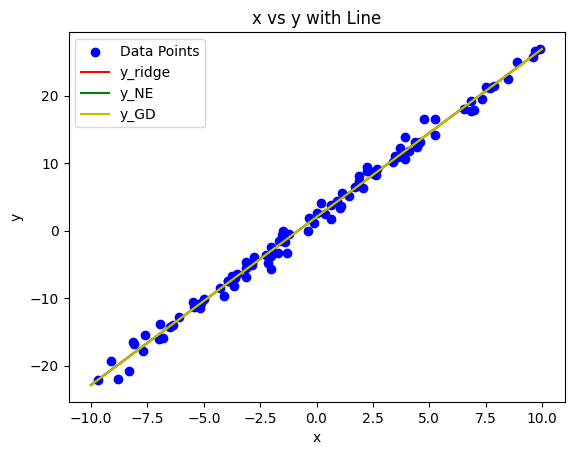

In [ ]:
# Plot the three lines that you obtain together with the data points



# Plot x vs y as scatter plot
plt.scatter(x, y, c='b', label='Data Points')

# Generate the line y = 0.5 + 3x
x_line = np.linspace(-10, 10, 100)
y_ridge = ridge_reg.intercept_ + ridge_reg.coef_* x_line
y_NE = thetaN[0] + thetaN[1]* x_line
y_GD = thetaGD[0] + thetaGD[1]* x_line


# Plot the line on top of the scatter plot
plt.plot(x_line, y_ridge, c='r', label='y_ridge')
plt.plot(x_line, y_NE, c='g', label='y_NE')
plt.plot(x_line, y_GD, c='y', label='y_GD')


plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y with Line')
plt.legend()
plt.show()








There is barely any difference